In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import const

In [3]:
us = pd.read_pickle('../data/processed/owid-us-covid-data.pickle')
us['year'] = us['date'].dt.year
us['month'] = us['date'].dt.month
us['day'] = us['date'].dt.day
us

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day
0,USA,North America,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,78.86,0.926,338289856.0,-2771.0000,-4.41,-4.41,-8.248447,2020,1,5
1,USA,North America,United States,2020-01-12,NaN,0.0,NaN,NaN,0.0,NaN,...,78.86,0.926,338289856.0,-5332.6000,-4.23,-4.06,-15.873573,2020,1,12
2,USA,North America,United States,2020-01-19,NaN,0.0,NaN,NaN,0.0,NaN,...,78.86,0.926,338289856.0,-7748.4004,-4.13,-3.92,-23.064695,2020,1,19
3,USA,North America,United States,2020-01-26,7.0,7.0,NaN,NaN,0.0,NaN,...,78.86,0.926,338289856.0,-9482.0000,-3.82,-2.85,-28.225110,2020,1,26
4,USA,North America,United States,2020-02-02,9.0,2.0,NaN,NaN,0.0,NaN,...,78.86,0.926,338289856.0,-11206.0000,-3.63,-2.85,-33.356945,2020,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,USA,North America,United States,2024-01-08,NaN,NaN,NaN,NaN,NaN,NaN,...,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2024,1,8
1417,USA,North America,United States,2024-01-09,NaN,NaN,NaN,NaN,NaN,NaN,...,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2024,1,9
1418,USA,North America,United States,2024-01-10,NaN,NaN,NaN,NaN,NaN,NaN,...,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2024,1,10
1419,USA,North America,United States,2024-01-11,NaN,NaN,NaN,NaN,NaN,NaN,...,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN,2024,1,11


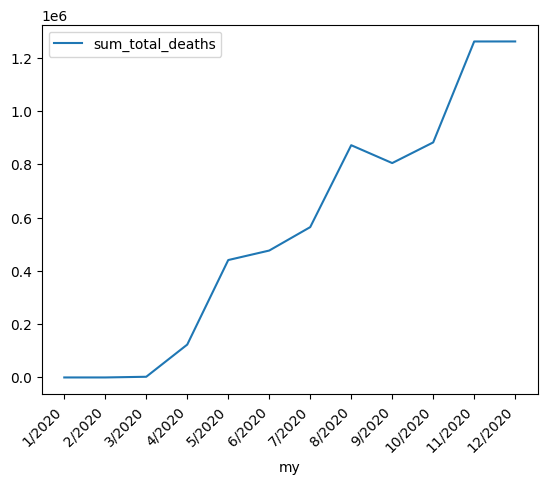

In [10]:
df_gb_ym = (
    us[us['year'].isin([2020])]
    .groupby(['year', 'month'])
    .agg(
        sum_total_cases=('total_cases', 'sum'),
        sum_total_deaths=('total_deaths', 'sum')
    )
    .reset_index()
)
df_gb_ym['my'] = df_gb_ym['month'].astype(str) + '/' + df_gb_ym['year'].astype(str)
ax = (
    df_gb_ym
    .plot(x='my', y='sum_total_deaths')
)

ax.set_xticks(range(len(df_gb_ym['my'])))
ax.set_xticklabels(df_gb_ym['my'], rotation=45, ha='right')
plt.show()